In [1]:
#Problem Statement
# I want to understand the customers, like which segment of people are our Target Customers. This help us to make our marketing strategy accordingly.


##########***Libraries***##########
#Pandas library is used for data analysis
import pandas as pd

#Numpy library used for working with arrays
import numpy as np

#matplotlib is a plotting library
import matplotlib.pyplot as plt

#sklearn is a library for classification, regression and clustering algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier,export_graphviz,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

#graphviz is used for drawing graphs
import graphviz

In [2]:
#Read the csv file and show it by using pandas
f=pd.read_csv("MallCustomers.csv")
f

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
#f= ff.dropna()
#f

In [21]:
#show first 5 column
f.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group
0,1,Male,19,15,39,G1
1,2,Male,21,15,81,G1
2,3,Female,20,16,6,G1
3,4,Female,23,16,77,G1
4,5,Female,31,17,40,G2


In [22]:
#show last 5 column
f.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group
195,196,Female,35,120,79,G2
196,197,Female,45,126,28,G2
197,198,Male,32,126,74,G2
198,199,Male,32,137,18,G2
199,200,Male,30,137,83,G2


In [23]:
f.shape

(200, 6)

In [24]:
f.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [25]:
f.values

array([[1, 'Male', 19, 15, 39, 'G1'],
       [2, 'Male', 21, 15, 81, 'G1'],
       [3, 'Female', 20, 16, 6, 'G1'],
       ...,
       [198, 'Male', 32, 126, 74, 'G2'],
       [199, 'Male', 32, 137, 18, 'G2'],
       [200, 'Male', 30, 137, 83, 'G2']], dtype=object)

In [26]:
#Mean of column Age
print('Mean Age: ', f['Age'].mean())
#Median of column Age
print('Median Age: ', f['Age'].median())
#Mode of column Age
print('Mode Age: ', f['Age'].mode())

Mean Age:  38.85
Median Age:  36.0
Mode Age:  0    32
dtype: int64


In [4]:
#Binning method is used to smoothing data or to handle noisy data. The data is first sorted and then the sorted values are distributed into a number of buckets or bins.
bins=[0,25,50,75]
ggg= ['G1','G2','G3']
f['Age Group']=pd.cut(f['Age'],bins, labels=ggg)
f

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group
0,1,Male,19,15,39,G1
1,2,Male,21,15,81,G1
2,3,Female,20,16,6,G1
3,4,Female,23,16,77,G1
4,5,Female,31,17,40,G2
...,...,...,...,...,...,...
195,196,Female,35,120,79,G2
196,197,Female,45,126,28,G2
197,198,Male,32,126,74,G2
198,199,Male,32,137,18,G2


In [5]:
#Making variables
x_var = ['Annual Income (k$)','Spending Score (1-100)']
x = f[x_var]
y_var = ['Gender']
y = f[y_var]

In [6]:
#iloc function enables us to select a particular cell of the dataset
abc = f.iloc[:, [3,4]].values

scaler = MinMaxScaler()
asd=scaler.fit_transform(abc)

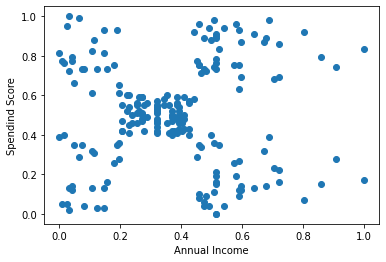

In [7]:
#This is the scatter plot without clustering
plt.scatter(asd[:,0],asd [:,1])
plt.xlabel('Annual Income')
plt.ylabel('Spendind Score')
plt.show()

In [8]:
#Apply KMean Clustering

#We make k(5) number of cluster
kmeans5 = KMeans(n_clusters=5)

# Apply KMeans to our 'asd' data
y_kmeans5 = kmeans5.fit_predict(abc)
print(y_kmeans5)

#Predict the center of each cluster
kmeans5.cluster_centers_

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 3 0 1 0 3 0 3 0 1 0 3 0 3 0 3 0 3 0 1 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

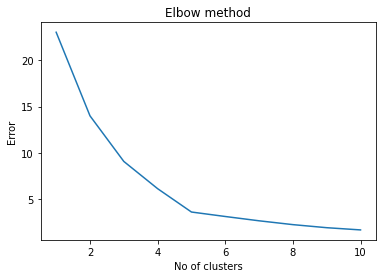

In [9]:
#Find the error. This help us to identify that how much # of clusters we should make.
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(asd)
    kmeans.fit(asd)
    Error.append(kmeans.inertia_)

#Graphically represent those errors
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

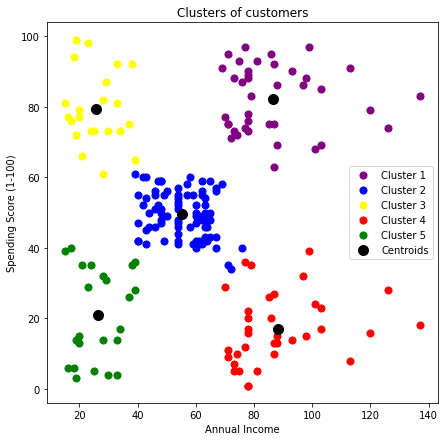

In [10]:
#Scatter Plot with Clustering

plt.figure(figsize=(7,7))
plt.scatter(abc[y_kmeans5 == 0, 0], abc[y_kmeans5 == 0, 1], s = 50, c = 'purple', label = 'Cluster 1')
plt.scatter(abc[y_kmeans5 == 1, 0], abc[y_kmeans5 == 1, 1], s = 50, c = 'b', label = 'Cluster 2')
plt.scatter(abc[y_kmeans5 == 2, 0], abc[y_kmeans5 == 2, 1], s = 50, c = 'yellow', label = 'Cluster 3')
plt.scatter(abc[y_kmeans5 == 3, 0], abc[y_kmeans5 == 3, 1], s = 50, c = 'red', label = 'Cluster 4')
plt.scatter(abc[y_kmeans5 == 4, 0], abc[y_kmeans5 == 4, 1], s = 50, c = 'green', label = 'Cluster 5')
plt.scatter(kmeans5.cluster_centers_[:, 0], kmeans5.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [18]:
#Analyzing the data to derive solution:

#Yellow - People having low annual income and high spending score (careless)
#Purple - high income and high spending score (target)
#Blue - medium indome and medium spending score (standart)
#Red - high icome and low spending rate (careful)
#Green - low income and low spending score (sensible)

#So by seeing this data we can conclude that the segment of people having high income and high spending score are our target customers

In [12]:
#iloc function enables us to select a particular cell of the dataset
abc1 = f.iloc[:, [2,4]].values

scaler = MinMaxScaler()
asd_1=scaler.fit_transform(abc1)

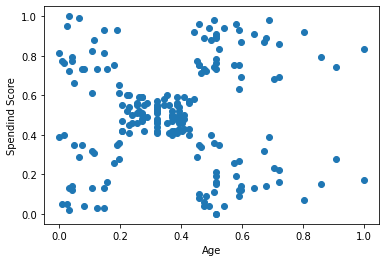

In [13]:
#This is the scatter plot without clustering
plt.scatter(asd[:,0],asd [:,1])
plt.xlabel('Age')
plt.ylabel('Spendind Score')
plt.show()

In [14]:
#Applying KMean Clustering
kmeans6 = KMeans(n_clusters=6)
y_kmeans6 = kmeans6.fit_predict(abc1)
print(y_kmeans6)

kmeans6.cluster_centers_

[2 1 3 1 2 1 3 1 5 1 5 1 5 1 3 1 0 2 0 1 0 1 5 1 5 1 0 2 0 1 5 1 5 1 5 1 3
 1 3 1 4 1 0 2 0 2 4 2 2 2 4 2 2 4 0 0 4 4 2 4 4 2 4 4 4 2 0 4 2 2 4 0 4 4
 4 2 0 0 2 0 4 2 4 0 2 0 4 2 2 0 4 2 0 0 2 2 0 2 0 2 2 0 4 2 4 2 4 4 4 4 4
 2 0 2 2 2 4 4 0 4 2 0 2 1 3 1 0 1 5 1 5 1 2 1 3 1 5 1 3 1 5 1 2 1 3 1 0 1
 3 1 3 1 3 1 5 1 3 1 3 1 0 1 3 1 0 1 3 1 3 2 3 1 3 1 5 1 5 1 5 1 0 1 5 1 0
 1 5 1 3 1 3 1 3 1 5 1 0 1 3 1]


array([[45.25      , 39.53125   ],
       [30.1754386 , 82.35087719],
       [25.84615385, 51.33333333],
       [33.13043478, 14.17391304],
       [60.36666667, 51.16666667],
       [53.73684211, 11.47368421]])

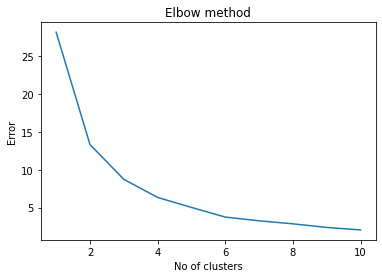

In [15]:
#Find the error. This help us to identify that how much # of clusters we should make.
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(asd_1)
    kmeans.fit(asd_1)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

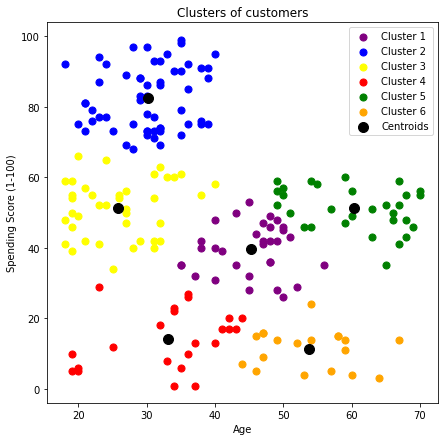

In [16]:
#Scatter Plot with Clustering

plt.figure(figsize=(7,7))
plt.scatter(abc1[y_kmeans6 == 0, 0], abc1[y_kmeans6 == 0, 1], s = 50, c = 'Purple', label = 'Cluster 1')
plt.scatter(abc1[y_kmeans6 == 1, 0], abc1[y_kmeans6 == 1, 1], s = 50, c = 'b', label = 'Cluster 2')
plt.scatter(abc1[y_kmeans6 == 2, 0], abc1[y_kmeans6 == 2, 1], s = 50, c = 'yellow', label = 'Cluster 3')
plt.scatter(abc1[y_kmeans6 == 3, 0], abc1[y_kmeans6 == 3, 1], s = 50, c = 'red', label = 'Cluster 4')
plt.scatter(abc1[y_kmeans6 == 4, 0], abc1[y_kmeans6 == 4, 1], s = 50, c = 'green', label = 'Cluster 5')
plt.scatter(abc1[y_kmeans6 == 5, 0], abc1[y_kmeans6 == 5, 1], s = 50, c = 'orange', label = 'Cluster 6')
plt.scatter(kmeans6.cluster_centers_[:, 0], kmeans6.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [19]:
#Analyzing the data to derive solution:

#Purple - middle age and medium spendings
#Red - young and low spending
#Yellow - young and medium spending score
#Orange - the elderly with low spendings
#Green - the elderly with medium spendings
#Blue - young that spend a lot (Target)

#The data shows that Young people have high spending score so they are our target market